<a href="https://colab.research.google.com/github/Obreintelly/EDA/blob/main/Week_2_IP_Exploratory_Data_Analysis_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Univariate, Bivariate & Multivariate Analysis

# Importing Python Libraries

In [1]:
#importing Pandas libraries
import pandas as pd
#importing numpy libraries
import numpy as np
#Importing Seaborn Library
import seaborn as sns
#Importing Matplotlib Library
import matplotlib.pyplot as plt
% matplotlib inline 


In [ ]:
#Dataset url = http://bit.ly/FinancialDataset

# Loading and Previewing Our Dataset

In [2]:
finance= pd.read_csv('http://bit.ly/FinancialDataset')

#Previewing the top of our dataset
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
#Preview the bottom of our dataset

finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [4]:
#Size of the dataset. Number of records in our dataset
finance.shape

(23524, 13)

In [5]:
#Checking our columns have the correct data types
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# External Dataset Validation

# Tidying the Dataset

In [6]:
finance.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [7]:
#Checking for missing values
finance.isna()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,False,False,False,False,False,False,False,False,False,False,False,False,False
23520,False,False,False,False,False,False,False,False,False,False,False,False,False
23521,False,False,False,False,False,False,False,False,False,False,False,False,False
23522,False,False,False,False,False,False,False,False,False,False,False,False,False


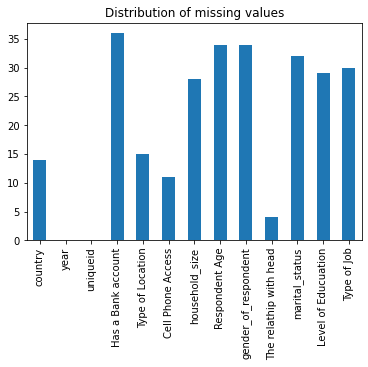

In [8]:
#Plotting missing values to visualize their distribution 
#
finance.isna().sum().plot(kind='bar')
plt.title('Distribution of missing values')
plt.show()

In [9]:
#Dropping all the missing values since we have a big data sample size. 
#The effect on our findings will be miniscule. 
finance.dropna(inplace=True)

In [10]:
finance.isna().any()

country                   False
year                      False
uniqueid                  False
Has a Bank account        False
Type of Location          False
Cell Phone Access         False
household_size            False
Respondent Age            False
gender_of_respondent      False
The relathip with head    False
marital_status            False
Level of Educuation       False
Type of Job               False
dtype: bool

In [11]:
#Checking for duplicates
finance.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23343, dtype: bool

In [12]:
#Doesn't seem like our data is duplicated. We proceed to drop any unseen duplicates.
finance.drop_duplicates()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


# Tidying Up Columns

In [13]:
#Rename Columns
finance.rename(columns={'Level of Educuation':'Education_level','Type of Location':'Location','Respondent Age':'Age','gender_of_respondent':'Gender','Cell Phone Access':'Cellphone Access', 'The relathip with head':'relationship with head', 'Type of Job':'Job_type'}, inplace=True)

In [14]:
#Standardizing columns
finance.columns = finance.columns.str.strip().str.upper().str.replace(' ', '_')
finance.head(1)

,COUNTRY,YEAR,UNIQUEID,HAS_A_BANK_ACCOUNT,LOCATION,CELLPHONE_ACCESS,HOUSEHOLD_SIZE,AGE,GENDER,RELATIONSHIP_WITH_HEAD,MARITAL_STATUS,EDUCATION_LEVEL,JOB_TYPE
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


In [15]:
#Dropping columns we do not need to answer the question under investigations
finance['HOUSEHOLD_SIZE'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21.,  0., 18., 17., 20.])

In [16]:
#Investigating our columns further
finance['YEAR'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [17]:
#From the dataset description and external data, we know we do not have data beyond 2018
#However ourdataset has Years 2029, 2039 and 2056
#Let's check where and how many times they appear. 
finance[finance['YEAR']>2018]

,COUNTRY,YEAR,UNIQUEID,HAS_A_BANK_ACCOUNT,LOCATION,CELLPHONE_ACCESS,HOUSEHOLD_SIZE,AGE,GENDER,RELATIONSHIP_WITH_HEAD,MARITAL_STATUS,EDUCATION_LEVEL,JOB_TYPE
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [18]:
#Dropping years not in scope
finance = finance.drop(finance[finance['YEAR']>2018].index)

finance['YEAR'].unique()

array([2018, 2016, 2017])

In [19]:
#Investigating the Country column
finance['COUNTRY'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [20]:
#Investigating the Age Column 
finance['AGE'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [21]:
finance.drop(['UNIQUEID', 'MARITAL_STATUS','RELATIONSHIP_WITH_HEAD'], axis=1, inplace=True)

In [22]:
#Checking number of records in our dataset
finance.shape

(23340, 10)

In [23]:
#Display remaining columns
finance.head()

,COUNTRY,YEAR,HAS_A_BANK_ACCOUNT,LOCATION,CELLPHONE_ACCESS,HOUSEHOLD_SIZE,AGE,GENDER,EDUCATION_LEVEL,JOB_TYPE
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [24]:
#Checking for Outliers in Our Dataset

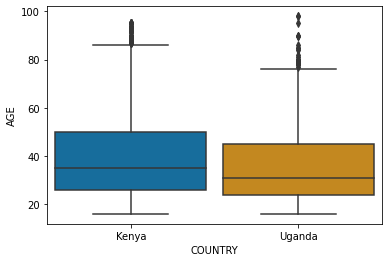

In [25]:
#Filter for 2018 Data
finance_2018= finance[finance['YEAR']==2018]
bplot =sns.boxplot(y='AGE', x='COUNTRY', data= finance_2018,  width=0.9, palette='colorblind')


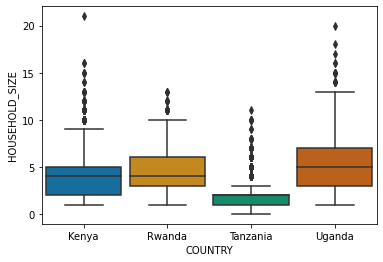

In [26]:
bplot =sns.boxplot(y='HOUSEHOLD_SIZE', x='COUNTRY', data= finance,  width=0.9, palette='colorblind')

# Save Tidied Up Version

In [28]:
finance.to_csv('finance_inclusion.csv', index=False)

In [29]:
#Load our new Dataset
finance_inclusion = pd.read_csv('/content/finance_inclusion.csv')
finance_inclusion.head()

,COUNTRY,YEAR,HAS_A_BANK_ACCOUNT,LOCATION,CELLPHONE_ACCESS,HOUSEHOLD_SIZE,AGE,GENDER,EDUCATION_LEVEL,JOB_TYPE
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Primary education,Informally employed


In [30]:
finance_inclusion['EDUCATION_LEVEL'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

# **1. Univariate Analysis**

# Categorical Variables in Our Dataset

In [31]:
#Generating Frequency Tables for COUNTRY
finance_inclusion.COUNTRY.value_counts()

Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: COUNTRY, dtype: int64

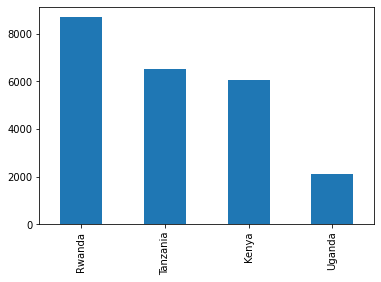

In [32]:
#Visual representation of frequency per country
finance_inclusion.COUNTRY.value_counts().plot.bar()

In [33]:
finance_inclusion.groupby('COUNTRY')['YEAR'].value_counts()

COUNTRY   YEAR
Kenya     2018    6062
Rwanda    2016    8683
Tanzania  2017    6500
Uganda    2018    2095
Name: YEAR, dtype: int64

(array([1083., 1354., 1030.,  821.,  611.,  443.,  376.,  194.,  105.,
          45.]),
 array([16. , 23.9, 31.8, 39.7, 47.6, 55.5, 63.4, 71.3, 79.2, 87.1, 95. ]),
 <a list of 10 Patch objects>)

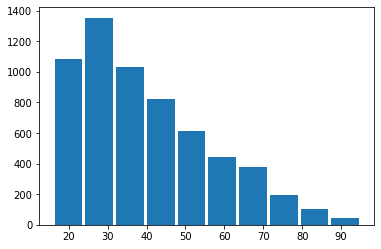

In [34]:
#Creating a histogram showing the age distribution in Kenya
kenya_only = finance_inclusion[finance_inclusion['COUNTRY']=='Kenya']
plt.hist(kenya_only['AGE'], bins=10, histtype='bar', rwidth=0.9)

(array([277., 863., 768., 547., 354., 228., 141.,  74.,  36.,   8.]),
 array([16. , 23.9, 31.8, 39.7, 47.6, 55.5, 63.4, 71.3, 79.2, 87.1, 95. ]),
 <a list of 10 Patch objects>)

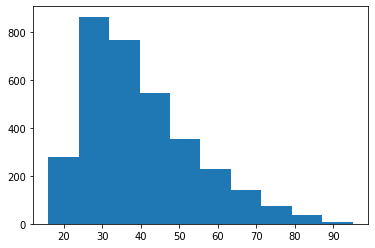

In [35]:
#Histogram of Kenyans with a bank acoount in Urban areas
kenya_with_account= finance_inclusion[finance_inclusion['HAS_A_BANK_ACCOUNT']=='Yes']
plt.hist(kenya_with_account['AGE'], bins=10, histtype='bar')

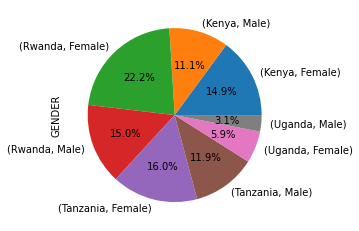

In [36]:
finance_inclusion.groupby('COUNTRY')['GENDER'].value_counts().plot(kind='pie', autopct= '%1.1f%%')

In [37]:
#Analysis for Kenya

Text(0.5, 1.0, 'Distribution of Bank Accounts by Gender in Kenya')

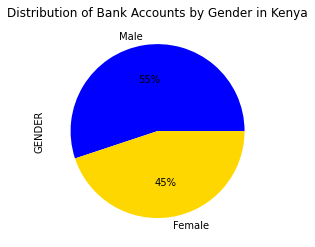

In [38]:
#Displaying Distribution of Bank Accounts by Gender in Kenya
colors=['blue', 'gold']
kenya_with_account['GENDER'].value_counts().plot(kind='pie', colors=colors, autopct='%1.0f%%')
plt.title('Distribution of Bank Accounts by Gender in Kenya')

In [39]:
#Displaying data filtered for Kenyans without bank accounts
kenya_no_account= finance_inclusion[finance_inclusion['HAS_A_BANK_ACCOUNT']=='No']

Text(0.5, 1.0, 'Distributions of Kenyans without Bank Accounts by Gender')

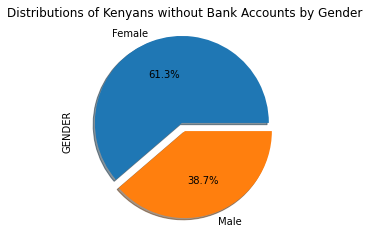

In [40]:
#Kenyans without accounts by Gender
explode =(0.1,0)
kenya_no_account['GENDER'].value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distributions of Kenyans without Bank Accounts by Gender')

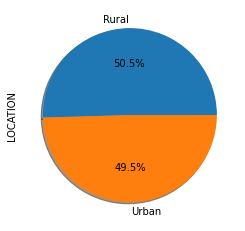

In [41]:
#Kenyans with Bank Accounts by location
kenya_with_account['LOCATION'].value_counts().plot(kind='pie',  shadow=True, autopct='%1.1f%%')

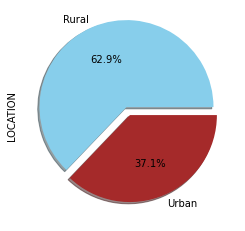

In [42]:
#Kenyans without Bank Accounts by Location

colors= ['skyblue', 'brown', 'gold']
kenya_no_account['LOCATION'].value_counts().plot(kind='pie', colors=colors, explode=explode, shadow=True, autopct='%1.1f%%')

Text(0.5, 1.0, 'Kenyans with Cellphones Vs Without Cellphones')

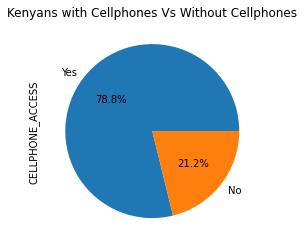

In [43]:
#KEnyans with Cellphone
kenya_only['CELLPHONE_ACCESS'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Kenyans with Cellphones Vs Without Cellphones')

Text(0.5, 1.0, '% of Kenyans with both Phone and Account by Location')

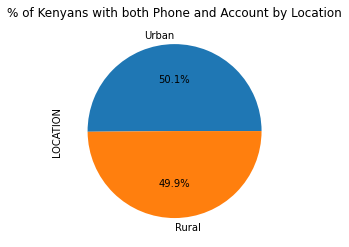

In [44]:
#% Of Kenyans with cellphones and Bank Accounts by location
cellphone_and_account = kenya_with_account[kenya_with_account['CELLPHONE_ACCESS']=='Yes']
cellphone_and_account['LOCATION'].value_counts().plot(kind='pie', autopct='%1.1f%%') 
plt.title('% of Kenyans with both Phone and Account by Location')


# Numerical Variables

In [45]:
#Filtering for all countries where individuals have a bank acoount 
all_with_account=finance_inclusion[finance_inclusion['HAS_A_BANK_ACCOUNT']=='Yes']

#Median Age with bank account
all_with_account['AGE'].median()


36.0

In [46]:
#Most common age
all_with_account['AGE'].mode()

0    30.0
dtype: float64

In [47]:
#More Analysis using describe

all_with_account.describe()

,YEAR,HOUSEHOLD_SIZE,AGE
count,3296.000000,3296.000000,3296.000000
mean,2017.213289,3.558859,39.605583
std,0.879208,2.215724,14.346347
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,29.000000
50%,2018.000000,3.000000,36.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,17.000000,95.000000


In [48]:
#Filtering for no bank accounts
all_no_account=finance_inclusion[finance_inclusion['HAS_A_BANK_ACCOUNT']=='No']


In [49]:
#Most Common Age with no Bank Account
all_no_account['AGE'].mode()

0    30.0
dtype: float64

In [50]:
#Median
all_no_account['AGE'].median()

35.0

In [51]:
#More Analysis using Describe()
all_no_account.describe()

,YEAR,HOUSEHOLD_SIZE,AGE
count,20044.000000,20044.000000,20044.000000
mean,2016.938685,3.709888,38.675763
std,0.837779,2.291225,16.847197
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,25.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


# **2. Bivariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Pair Plot of Financial Inclusion Data 2016-2018')

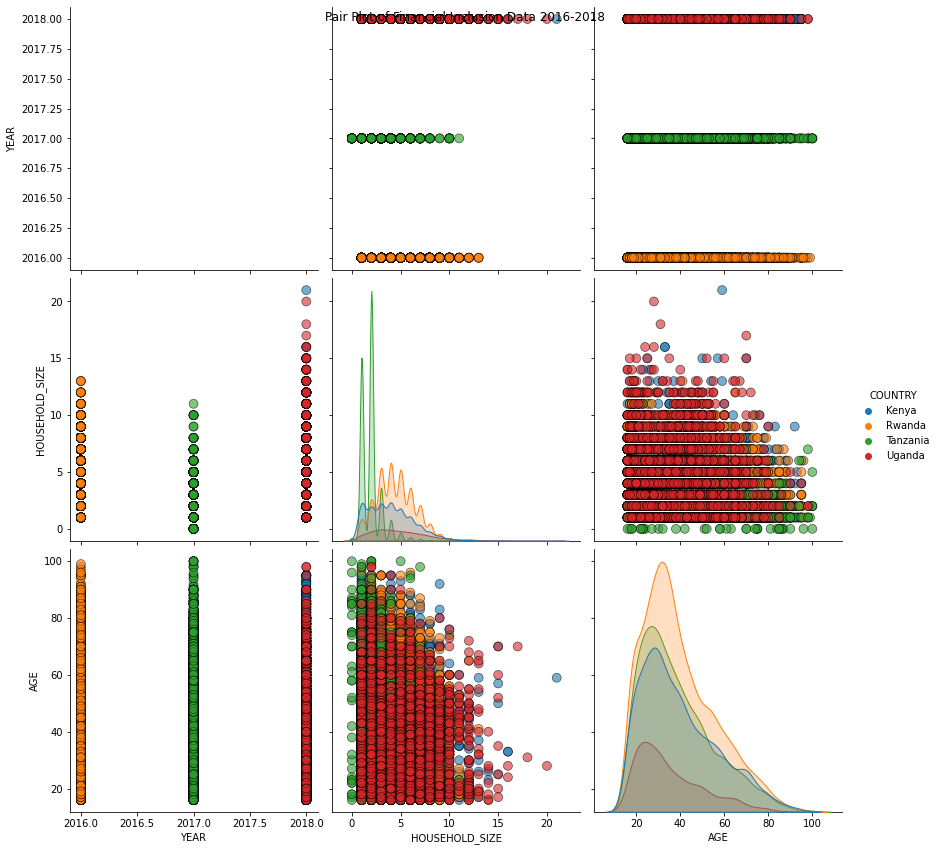

In [52]:
#Crossplots

sns.pairplot(finance_inclusion, hue='COUNTRY', diag_kind='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4 )
#Title
plt.suptitle('Pair Plot of Financial Inclusion Data 2016-2018')

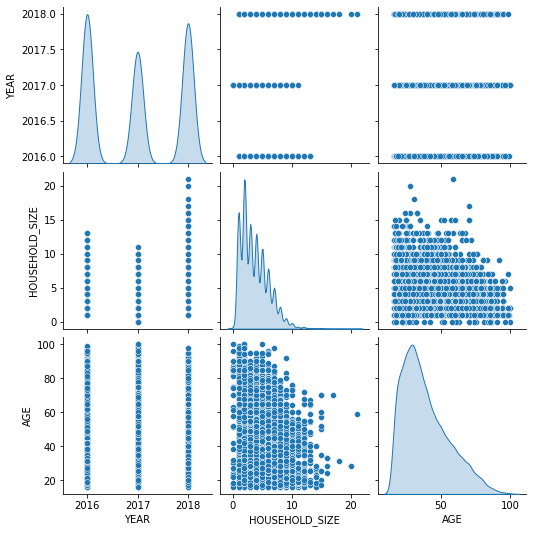

In [53]:
sns.pairplot(finance_inclusion, diag_kind='kde')


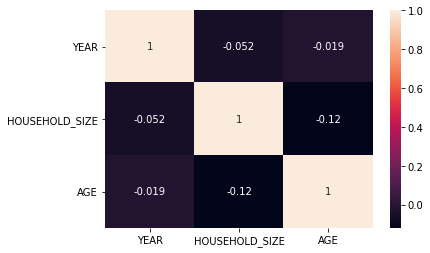

In [54]:
#General Overview of our dataset using heatmaps
#Heatmap below shows how the various variables correlate
sns.heatmap(finance_inclusion.corr(),annot=True)
plt.show()

In [55]:
finance_inclusion.corr()

,YEAR,HOUSEHOLD_SIZE,AGE
YEAR,1.000000,-0.052484,-0.018554
HOUSEHOLD_SIZE,-0.052484,1.000000,-0.119671
AGE,-0.018554,-0.119671,1.000000


Text(0.5, 1.0, 'Household Size Vs Age Scatterplot')

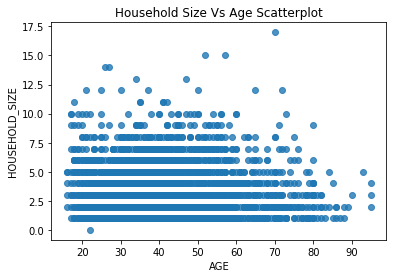

In [56]:
sns.regplot(x=kenya_with_account['AGE'], y = kenya_with_account['HOUSEHOLD_SIZE'], fit_reg=False)
plt.title('Household Size Vs Age Scatterplot')

#There is no relationship between age and household size for Kenyans with bank accounts 

In [57]:
#Calculating the Pearson Coefficient
pearson_coeff = kenya_with_account['AGE'].corr(kenya_with_account['HOUSEHOLD_SIZE'], method='pearson')
print(pearson_coeff)

#THe results below i.e our Pearson Coefficient bear us out. There is no relationship between age and household size

0.022135934498329325


In [58]:
#Calculating the Pearson coefficient for all the countries 
p_c= finance_inclusion['AGE'].corr(finance_inclusion['HOUSEHOLD_SIZE'], method='pearson')
print(p_c)
#For all countries in the datset, there is a weak linear correlation between Age and Household_Size

-0.11967115234154868


# Categorical Data

In [178]:
#kenya_with_account[['HAS_A_BANK_ACCOUNT', 'AGE', 'YEAR']].plot(kind='bar', figsize=(8,6), stacked=True)

**Hypothesis:**
There is a statistically significant difference in Gender(male and Female) between people with and without Bank Accounts

In [59]:
# We run a Chi-Square Test to check whether we can accept the above hypothesis


#Importing the relevant library for hypothesis testing
from scipy.stats import chi2_contingency

In [60]:
#Convert the data into a contingency table with frequencies
cont_freq= pd.crosstab(finance_inclusion['GENDER'], finance_inclusion['HAS_A_BANK_ACCOUNT'])
cont_freq

HAS_A_BANK_ACCOUNT,No,Yes
GENDER,,
Female,12286,1480
Male,7758,1816


In [61]:
#Deriving Percentages by Gender rows
cont_freq_pct = pd.crosstab(finance_inclusion['GENDER'], finance_inclusion['HAS_A_BANK_ACCOUNT'], normalize='index')
cont_freq_pct

HAS_A_BANK_ACCOUNT,No,Yes
GENDER,,
Female,0.892489,0.107511
Male,0.810320,0.189680


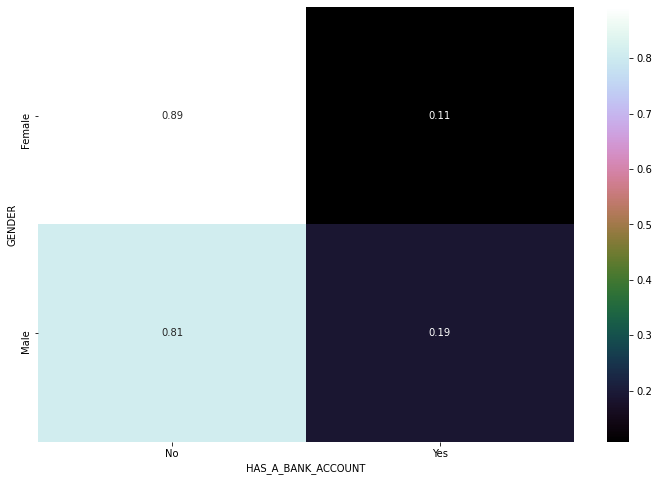

In [62]:
#We visualize the contingency tables using Heatmaps
plt.figure(figsize=(12,8))
sns.heatmap(cont_freq_pct, annot = True, cmap="cubehelix")

#Passing the contingency table to Chi2_contingency function will yield:
#Chi2: The Test Statistic
#p: The p-value of the test
#dof: Degrees of freedom
#expected: The expected frequencies, based on the marginal sums of the table

In [63]:
#Chi-square test of independence
c,p, dof, expected=chi2_contingency(cont_freq_pct)
print(p)


0.06805582602339752


#The p-value is 6.8%. We therefore do not reject the null hypothesis at 95% Confidence that there is a statistically significant difference between people with banks and without banks along gender lines. 

In [ ]:
#Hypothesis testing for Bank Account Vs Level of education 

**Hypothesis:** There is a statistically significant difference in bank account ownership and education level

In [64]:
#Converting our data into Frequency Tables
cont_ed= pd.crosstab(finance_inclusion['EDUCATION_LEVEL'], finance_inclusion['HAS_A_BANK_ACCOUNT'])
cont_ed

HAS_A_BANK_ACCOUNT,No,Yes
EDUCATION_LEVEL,,
6,22,5
No formal education,4291,176
Other/Dont know/RTA,2,6
Primary education,11605,1083
Secondary education,3225,981
Tertiary education,554,589
Vocational/Specialised training,345,456


In [65]:
#Derving Percentages of from our frequency tables
cont_ed_pct = pd.crosstab(finance_inclusion['EDUCATION_LEVEL'], finance_inclusion['HAS_A_BANK_ACCOUNT'], normalize='index')
cont_ed_pct

HAS_A_BANK_ACCOUNT,No,Yes
EDUCATION_LEVEL,,
6,0.814815,0.185185
No formal education,0.960600,0.039400
Other/Dont know/RTA,0.250000,0.750000
Primary education,0.914644,0.085356
Secondary education,0.766762,0.233238
Tertiary education,0.484689,0.515311
Vocational/Specialised training,0.430712,0.569288


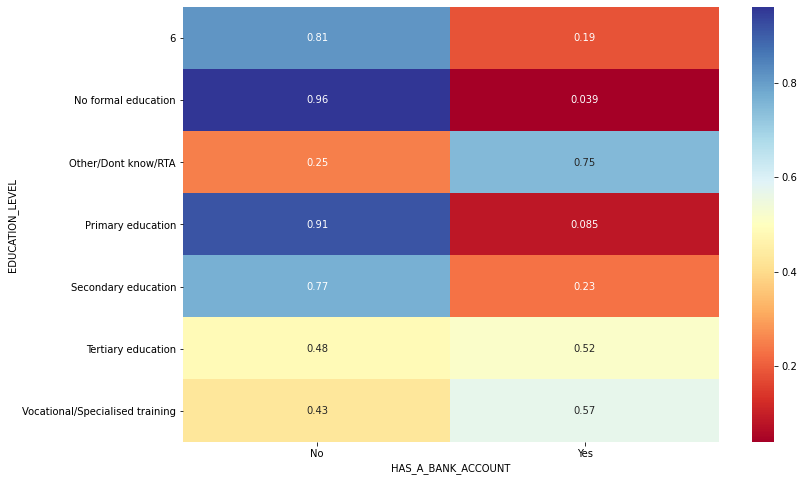

In [66]:
#We visualize the contingency tables using Heatmaps
plt.figure(figsize=(12,8))
sns.heatmap(cont_ed_pct, annot = True, cmap="RdYlBu")

In [67]:
c,p, dof, expected=chi2_contingency(cont_ed_pct)
print(p)


0.9223932885962577


#The p-value is 92%. We do not reject the null hypothesis at 95% confidence level. THe level of education is a key factor in determining whether one has a bank account or not. 

# Job_Type Vs Bank Account

In [68]:
#Alternative hypotheis for Jobs
#There is no statistically significant relationship between one's Job type and whether they have a bank account or not

In [69]:
cont_job= pd.crosstab(finance_inclusion['JOB_TYPE'], finance_inclusion['HAS_A_BANK_ACCOUNT'])
cont_job

HAS_A_BANK_ACCOUNT,No,Yes
JOB_TYPE,,
Dont Know/Refuse to answer,111,14
Farming and Fishing,4788,634
Formally employed Government,87,299
Formally employed Private,481,566
Government Dependent,197,50
Informally employed,5109,440
No Income,605,13
Other Income,881,196
Remittance Dependent,2268,240


In [70]:
cont_job_pct = pd.crosstab(finance_inclusion['JOB_TYPE'], finance_inclusion['HAS_A_BANK_ACCOUNT'], normalize='index')
cont_job_pct

HAS_A_BANK_ACCOUNT,No,Yes
JOB_TYPE,,
Dont Know/Refuse to answer,0.888000,0.112000
Farming and Fishing,0.883069,0.116931
Formally employed Government,0.225389,0.774611
Formally employed Private,0.459408,0.540592
Government Dependent,0.797571,0.202429
Informally employed,0.920706,0.079294
No Income,0.978964,0.021036
Other Income,0.818013,0.181987
Remittance Dependent,0.904306,0.095694


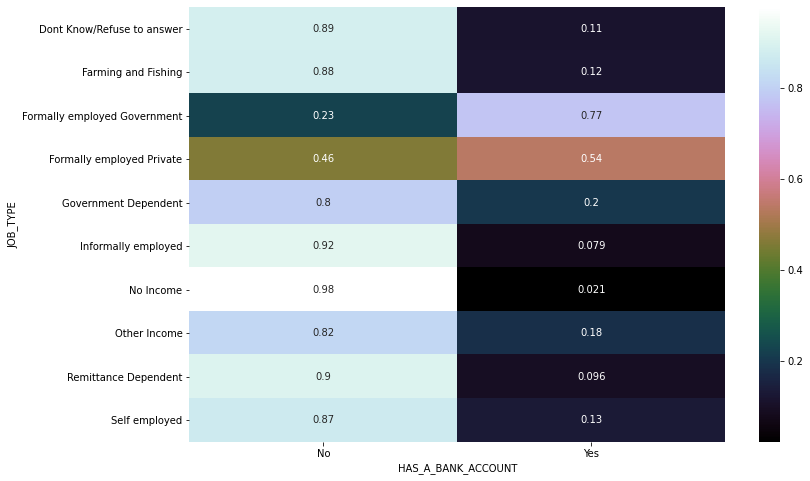

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(cont_job_pct, annot = True, cmap="cubehelix")

In [72]:
c,p, dof, expected=chi2_contingency(cont_job_pct)
print(p)
print(c)
#With a p-value of 96.6% at 95% level of confidence we reject the alternative hypotheis

0.9660321891094782
2.95552367766429


# **3.0 Multivariate Analysis**

In [106]:
# Step 1: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.

X= finance_inclusion[['AGE', 'YEAR', 'HOUSEHOLD_SIZE']]
y= finance_inclusion[['HAS_A_BANK_ACCOUNT', 'CELLPHONE_ACCESS','LOCATION']]

In [107]:
# Step 2: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [108]:
#Step 3:
#Data Scaling
#We first begin by standardizing our data to make sure there is no bias accorded on the basis of size
#TO do this, we use the StandardSclaer from Scikit-Learn 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [110]:
#Step 4: PCA Application 
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [111]:
# Step 5: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

In [112]:
# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 37.47% variance. 
# Similarly, the second principal component causes 33.75% variance in the dataset. 
# Collectively we can say that (37.47 + 33.75) 71.22% percent of the classification information contained 
# in the feature set is captured by the first two principal components.
explained_variance

array([0.37467165, 0.33750248, 0.28782588])

In [113]:
# Step 6: Using 1 Principal Component
# We will use 1 principal component to train our algorithm. To do so, we execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [114]:
# Step 7: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [116]:
# Step 8: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.multioutput import MultiOutputClassifier

cm=confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))



# **4.0 Follow Up Questions**